In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt

insurance_data = pd.read_csv(r'C:\Users\dadia\.vscode\Python-Y2\insurance.csv') 
insurance_data.head(5)
insurance_data.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
insurance_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
## Task #1: Clean up the data
insurance_data.duplicated()
insurance_data.isnull().sum()
insurance_data['region'] = insurance_data['region'].str.lower()
insurance_data.head(5)

FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}
insurance_data['sex'] = insurance_data['sex'].replace(sex_map)
insurance_data.head(5)
insurance_data['smoker'] = (insurance_data['smoker']=='yes')
insurance_data.head(5)
insurance_data.info()

### - Standardize sex to just two categories x


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


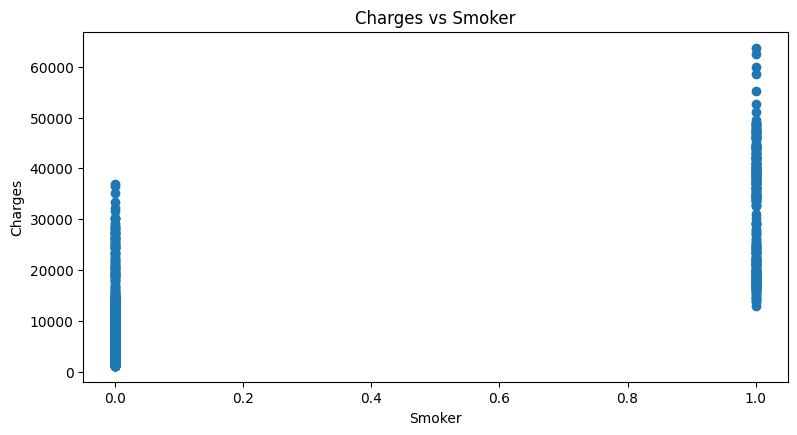

In [ ]:
### Task 2. Scatterplots of relationships between variables & charges
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.scatter(insurance_data['smoker'], insurance_data['charges'])
plt.title('Charges vs Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [ ]:

# Task #3 - Prepare the data for a model fitting
# Combine all the necessary transformations into a single DataFrame without duplication
df_new = pd.get_dummies(insurance_data, columns=['region', 'sex', 'smoker'], drop_first=True)
df_new = df_new.drop(columns=['region_southeast'])
df_new.head(10)




,age,bmi,children,charges,region_northwest,region_southwest,sex_male,smoker_True
0,19,27.900,0,16884.92400,False,True,False,True
1,18,33.770,1,1725.55230,False,False,True,False
2,28,33.000,3,4449.46200,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False
4,32,28.880,0,3866.85520,True,False,True,False
5,31,25.740,0,3756.62160,False,False,False,False
6,46,33.440,1,8240.58960,False,False,False,False
7,37,27.740,3,7281.50560,True,False,False,False
8,37,29.830,2,6406.41070,False,False,True,False
9,60,25.840,0,28923.13692,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score    

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

print(df_new.info())
print(y.info())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

val_df_new = pd.read_csv('validation_dataset.csv')

# Preprocess the validation dataset to match the training dataset
val_df_new = pd.get_dummies(val_df_new, columns=['region', 'sex', 'smoker'], drop_first=True)

# Ensure the feature names match those used during model training
for col in X_train.columns:
	if col not in val_df_new.columns:
		val_df_new[col] = 0 


val_df_new = val_df_new[X_train.columns]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(val_df_new)
validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   region_northwest  1338 non-null   bool   
 5   region_southwest  1338 non-null   bool   
 6   sex_male          1338 non-null   bool   
 7   smoker_True       1338 non-null   bool   
dtypes: bool(4), float64(2), int64(2)
memory usage: 47.2 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB
None


,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,6686.161058
2,27.0,male,29.150000,0.0,yes,southeast,4494.499109
3,71.0,male,65.502135,13.0,yes,southeast,33276.239662
4,28.0,male,38.060000,0.0,no,southeast,7668.971264


In [ ]:

def preprocess_df(df):
  df_new = pd.get_dummies(df, columns=['region', 'sex', 'smoker'], drop_first=True)

  # Ensure the feature names match those used during model training
  expected_columns = X.columns  # Use the columns from the training dataset
  for col in expected_columns:
      if col not in df_new.columns:
          df_new[col] = 0  # Add missing columns with default value 0

  # Drop any extra columns not present in the training dataset
  df_new = df_new[expected_columns]
  
  return df_new
  
val_df = pd.read_csv('validation_dataset.csv')
input_df = preprocess_df(val_df)
predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,6686.161058
2,27.0,male,29.150000,0.0,yes,southeast,4494.499109
3,71.0,male,65.502135,13.0,yes,southeast,33276.239662
4,28.0,male,38.060000,0.0,no,southeast,7668.971264


In [ ]:
from docx import Document
from docx.shared import RGBColor
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml

# Create a new Word document
doc = Document()

# Add title with baby blue color
title = doc.add_heading('📅 IELTS Study Timetable (2–3 Hours/Day)', level=1)
run = title.runs[0]
run.font.color.rgb = RGBColor(137, 207, 240)  # Baby Blue

# Add table with headers
table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'

# Add headers with pink background
hdr_cells = table.rows[0].cells
headers = ["Day", "Task", "Duration"]
for i, text in enumerate(headers):
    hdr_cells[i].text = text
    run = hdr_cells[i].paragraphs[0].runs[0]
    run.bold = True
    run.font.color.rgb = RGBColor(255, 105, 180)  # Pink
    hdr_cells[i]._tc.get_or_add_tcPr().append(parse_xml(r'<w:shd {} w:fill="FFC0CB"/>'.format(nsdecls('w'))))  # Light Pink

# Data for the schedule with alternating colors
schedule = [
    ("Monday", "Listening 🎧", "30 mins"),
    ("", "Reading 📚", "30 mins"),
    ("", "Writing ✍️", "45 mins - 1 hour"),
    ("", "Speaking 🎧", "30 mins"),
    ("Tuesday", "Listening 🎧", "30 mins"),
    ("", "Reading 📚", "30 mins"),
    ("", "Writing ✍️", "45 mins - 1 hour"),
    ("", "Speaking 🎧", "30 mins"),
    ("Wednesday", "Listening 🎧", "30 mins"),
    ("", "Reading 📚", "30 mins"),
    ("", "Writing ✍️", "45 mins - 1 hour"),
    ("", "Speaking 🎧", "30 mins"),
    ("Thursday", "Listening 🎧", "30 mins"),
    ("", "Reading 📚", "30 mins"),
    ("", "Writing ✍️", "45 mins - 1 hour"),
    ("", "Speaking 🎧", "30 mins"),
    ("Friday", "Listening 🎧", "30 mins"),
    ("", "Reading 📚", "30 mins"),
    ("", "Writing ✍️", "45 mins - 1 hour"),
    ("", "Speaking 🎧", "30 mins"),
    ("Saturday", "Full IELTS Practice Test 🏞️", "3 hours"),
    ("Sunday", "Light Study & Fluency ☕", "Flexible")
]

# Populate table with alternating colors (baby blue and pink)
for index, (day, task, duration) in enumerate(schedule):
    row_cells = table.add_row().cells
    row_cells[0].text = day
    row_cells[1].text = task
    row_cells[2].text = duration

    # Set alternating row colors
    bg_color = "ADD8E6" if index % 2 == 0 else "FFC0CB"  # Baby Blue / Pink
    for cell in row_cells:
        cell._tc.get_or_add_tcPr().append(parse_xml(r'<w:shd {} w:fill="{}"/>'.format(nsdecls('w'), bg_color)))

# Save the document
file_path = r"C:\Users\dadia\Downloads\IELTS_Study_Timetable_New.docx"  # Update to a valid path
doc.save(file_path)

